In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

In [79]:
train_df = pd.read_csv("./inputs/train.csv").set_index("id")
target = train_df["rainfall"]
train_df.drop("day", axis=1, inplace=True)
train_df.drop("rainfall", axis=1, inplace=True)
train_df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
id,,,,,,,,,,
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8


In [80]:
X_train, X_test, y_train, y_test = train_test_split(train_df, target, test_size=0.2, random_state=42)

In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
clf = CatBoostClassifier(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=42)
clf.load_model("./outputs/catboost.model")
clf.fit(X_train_scaled, y_train, init_model=clf)
clf.save_model("./outputs/catboost.model")
y_pred = clf.predict(X_test_scaled)
score = roc_auc_score(y_test, y_pred)
print(score)

0:	learn: 0.2201353	total: 2.92ms	remaining: 29.3s
1:	learn: 0.2201225	total: 6.75ms	remaining: 33.8s
2:	learn: 0.2201172	total: 9.5ms	remaining: 31.7s
3:	learn: 0.2201074	total: 12ms	remaining: 30s
4:	learn: 0.2200989	total: 14.3ms	remaining: 28.5s
5:	learn: 0.2200916	total: 16.5ms	remaining: 27.5s
6:	learn: 0.2200867	total: 19ms	remaining: 27.1s
7:	learn: 0.2200658	total: 21.6ms	remaining: 27s
8:	learn: 0.2200611	total: 23.6ms	remaining: 26.2s
9:	learn: 0.2200583	total: 25.6ms	remaining: 25.6s
10:	learn: 0.2200565	total: 28ms	remaining: 25.4s
11:	learn: 0.2200538	total: 30.5ms	remaining: 25.4s
12:	learn: 0.2200477	total: 33.2ms	remaining: 25.5s
13:	learn: 0.2200369	total: 36.2ms	remaining: 25.8s
14:	learn: 0.2200342	total: 38.7ms	remaining: 25.8s
15:	learn: 0.2200240	total: 40.8ms	remaining: 25.5s
16:	learn: 0.2200031	total: 43.3ms	remaining: 25.4s
17:	learn: 0.2199998	total: 45.7ms	remaining: 25.3s
18:	learn: 0.2199933	total: 49.3ms	remaining: 25.9s
19:	learn: 0.2199851	total: 53.5m

In [90]:
scaler = StandardScaler()
scaler.fit(train_df)
scaled_data = scaler.transform(train_df)
scaled_data

array([[ 0.67170214, -0.91380916, -0.64219876, ..., -0.72939738,
        -0.56090052, -0.4652908 ],
       [ 1.04311572, -1.79828913, -1.35084574, ..., -1.03280391,
        -0.6859253 ,  0.00962944],
       [ 1.85668833, -1.23222195, -1.50406671, ...,  1.25653632,
        -0.43587575, -0.37434863],
       ...,
       [-0.05343865, -1.30298035, -1.46576147, ...,  0.34631671,
        -0.81095007,  1.12114491],
       [ 1.53833383, -1.76290993, -1.6764403 , ..., -1.0052215 ,
        -0.81095007, -0.38445331],
       [ 0.03499315, -0.91380916, -0.92948808, ..., -0.75697979,
        -0.43587575,  2.6469525 ]])

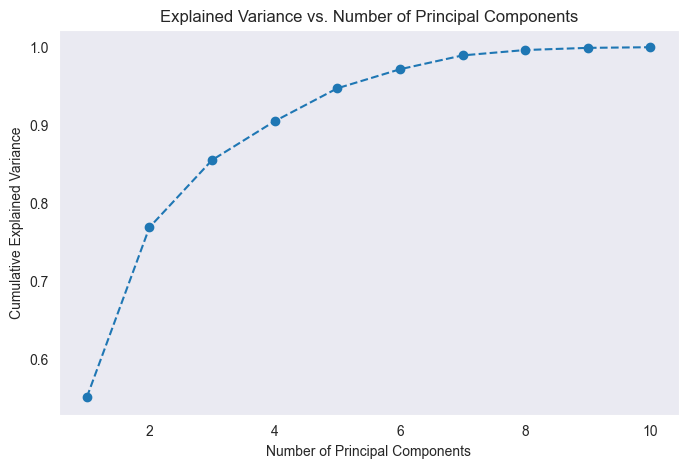

Explained Variance Ratios: [0.55066051 0.21814187 0.08633477 0.04993684 0.0421872  0.02445659
 0.01777808 0.00690249 0.00278423 0.00081742]
Cumulative Variance: [0.55066051 0.76880238 0.85513715 0.90507399 0.94726118 0.97171777
 0.98949586 0.99639834 0.99918258 1.        ]


In [91]:
# Introducing PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Principal Components")
plt.grid()
plt.show()

# Print explained variance ratios
print("Explained Variance Ratios:", explained_variance)
print("Cumulative Variance:", cumulative_variance)

In [96]:
X_pca = pca.transform(scaled_data)
X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2, random_state=42)

In [97]:
clf = CatBoostClassifier(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=42)
clf.load_model("./outputs/catboost.model")
clf.fit(X_train, y_train, init_model=clf)
y_pred = clf.predict(X_test)
score = roc_auc_score(y_test, y_pred)
print(score)

0:	learn: 0.5706529	total: 410ms	remaining: 1h 8m 22s
1:	learn: 0.5702298	total: 420ms	remaining: 34m 57s
2:	learn: 0.5698301	total: 428ms	remaining: 23m 46s
3:	learn: 0.5694105	total: 567ms	remaining: 23m 36s
4:	learn: 0.5689683	total: 575ms	remaining: 19m 10s
5:	learn: 0.5685231	total: 583ms	remaining: 16m 10s
6:	learn: 0.5680947	total: 617ms	remaining: 14m 40s
7:	learn: 0.5676861	total: 626ms	remaining: 13m 1s
8:	learn: 0.5672749	total: 635ms	remaining: 11m 44s
9:	learn: 0.5668629	total: 658ms	remaining: 10m 57s
10:	learn: 0.5664559	total: 673ms	remaining: 10m 11s
11:	learn: 0.5660725	total: 689ms	remaining: 9m 33s
12:	learn: 0.5656412	total: 697ms	remaining: 8m 55s
13:	learn: 0.5652685	total: 760ms	remaining: 9m 2s
14:	learn: 0.5648568	total: 769ms	remaining: 8m 31s
15:	learn: 0.5644301	total: 778ms	remaining: 8m 5s
16:	learn: 0.5639864	total: 800ms	remaining: 7m 49s
17:	learn: 0.5635514	total: 809ms	remaining: 7m 28s
18:	learn: 0.5631489	total: 818ms	remaining: 7m 9s
19:	learn: 0.